CUESTIONARIO ITEM 3


/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


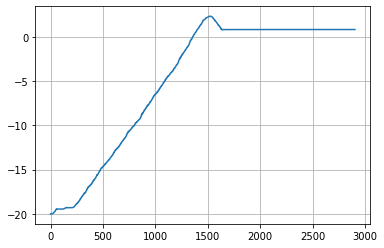

In [1]:
import math
import numpy as np#cal numerico
from scipy.integrate import ode#ec dif
import matplotlib.pyplot as chart

lamda = 1
eta = 1

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return x

def model(t, X):
    x1 = X[0]
    x2 = X[1]

    #parametros conocidos
    a=1;
    w=0.2;
    c=1.5;
    #derivadas
    x_d = math.sin(w*t);
    x_ddot = w*math.cos(w*t);
    x_dddot = -math.sin(w*t);#xd2
    F=0.5*x2*x2*math.cos(3*x1);
    k=F+eta;
	#sliding surface
    s = (x2 - x_ddot) + lamda*(x1 - x_d)

	#ley de control
    u = -c*(x2)*(math.cos(3*x1))+ x_dddot - lamda*(x2 - x_ddot)-k*sign(s)

	#dinamica del sistema
    x1dot = x2
    x2dot = c*x2*x2*math.cos(3*x1) + u

    Xdot = [x1dot, x2dot]

    error.append(x1 - x_d)#agregar
    return Xdot
#condiciones
X0 = [-20,30]
t0 = 0
t1 = 60#end time
dt = 0.01

error = []
t = []

r = ode(model).set_integrator('vode', method = 'bdf')
r.set_initial_value(X0, t0)

#integrador
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)


#print(Y)

chart.plot(error)
chart.grid()
chart.show()